Custom Collection by Simon Worthington (April 23): Paintings by Lucas Cranach the Elder https://www.wikidata.org/wiki/Q191748.

The collection Notebook only contains the SPARQL query and needs additional Python adding to parse the metadata output.

Madonna and Child in a Landscape


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (94530768 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


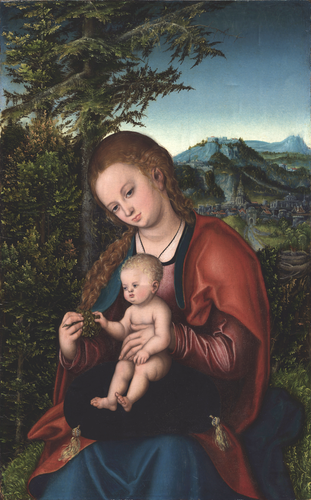




Cavalry


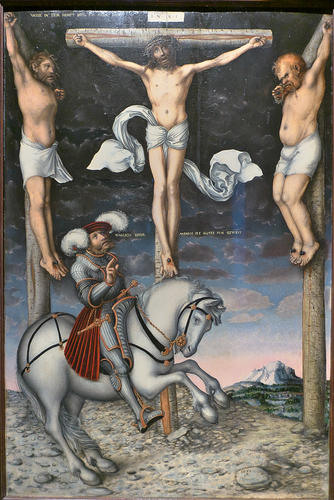




Cavalry


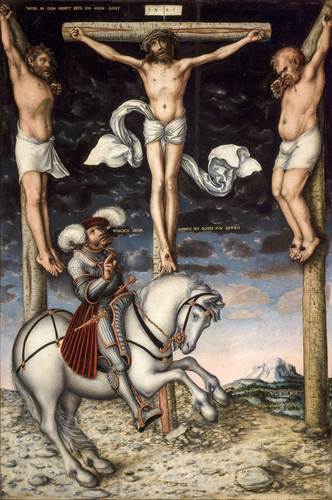




Portrait of a Lady


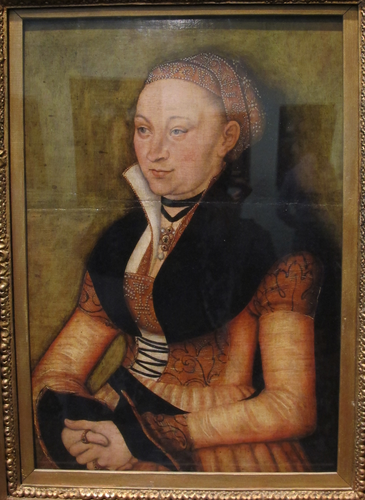




Adam and Eve


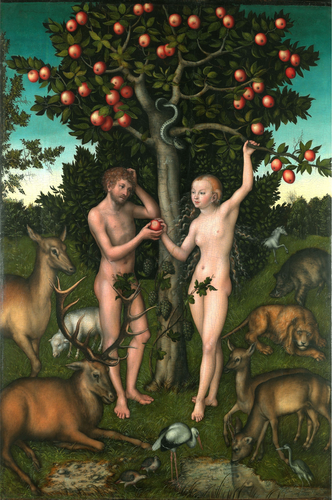




Passion Cycle - Christ washing the feet of the apostles


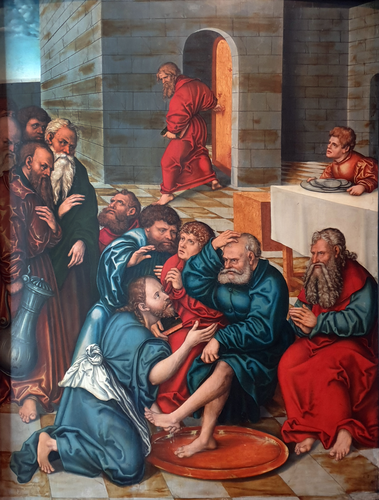




Adam


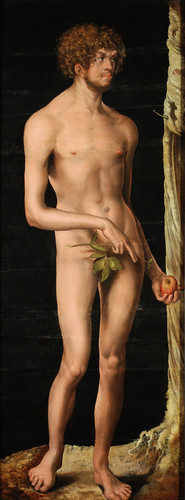




Eve


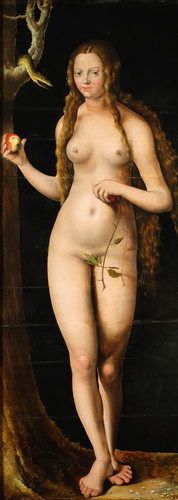




Christ crowned with Thorns


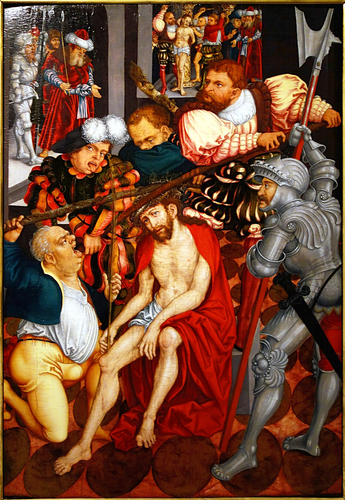




Portrait of a man with red whiskers


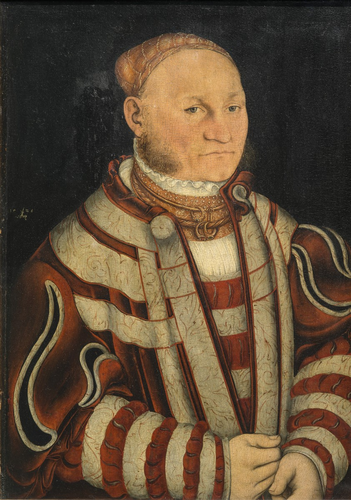




Christ on the cross between the two thiefs


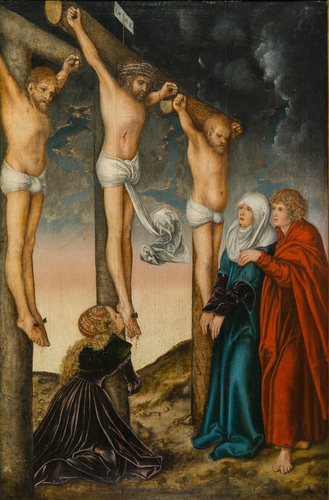




Adam and Eva


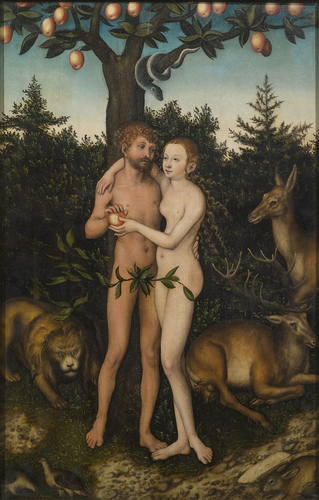




Madonna and Child with the Infant John the Baptist and Angels


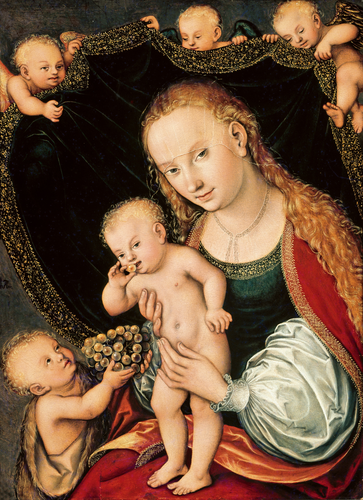




Caritas (Charity)


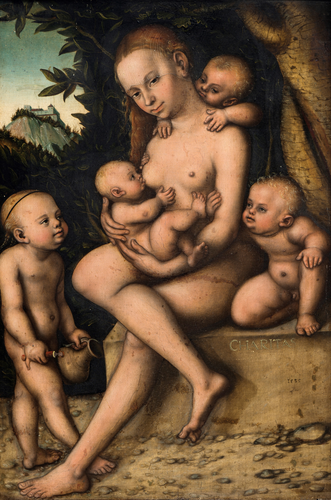




The Virgin and Child with Infant John the Baptist and Angels


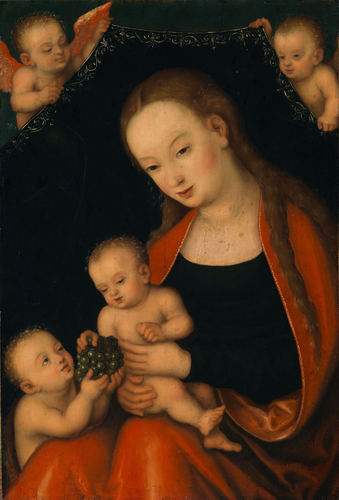




Judith with the Head of Holofernes


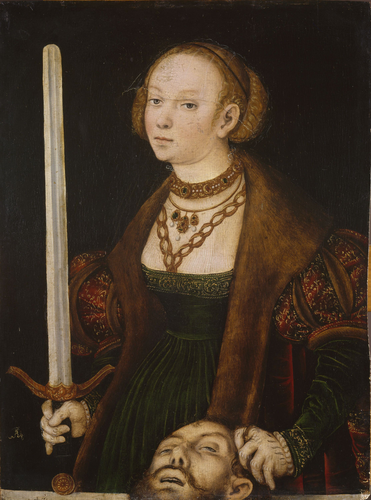




Christ on the Cross


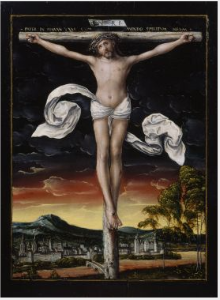




The Judgment of Paris


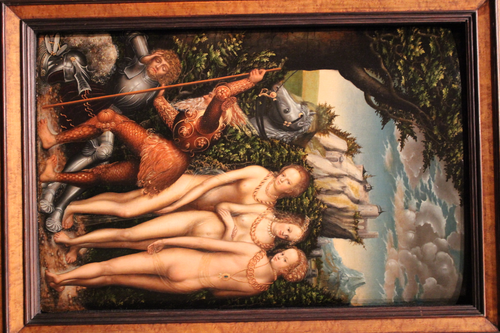




Judgment of Paris


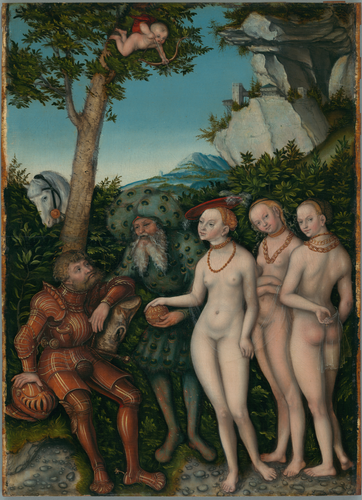




Cardinal Albrecht of Brandenburg as Saint Jerome


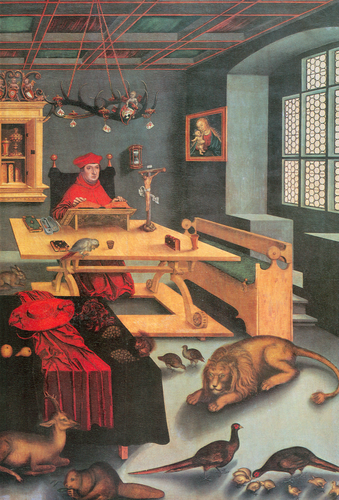




The Adoration of the Magi


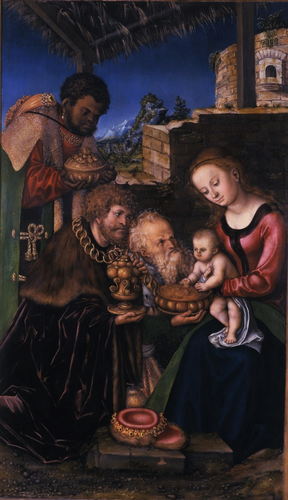




Beardless Young Man


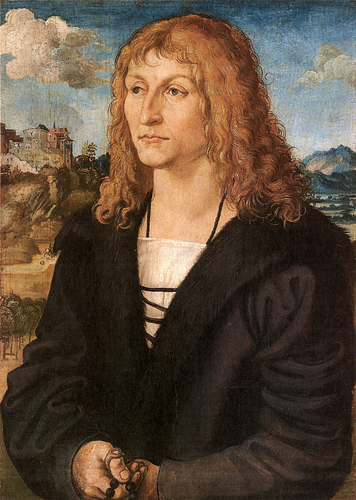

In [9]:
# pip install sparqlwrapper
# https://rdflib.github.io/sparqlwrapper/

import sys
from SPARQLWrapper import SPARQLWrapper, JSON
import requests
from PIL import Image


# SUBROUTINES

def get_delay(date):
    try:
        date = datetime.datetime.strptime(date, '%a, %d %b %Y %H:%M:%S GMT')
        timeout = int((date - datetime.datetime.now()).total_seconds())
    except ValueError:
        timeout = int(date)
    return timeout

def get_image(url, headers):
    r = requests.get(url, headers=headers, stream=True)
    if r.status_code == 200:
        im = Image.open(r.raw)
        return im
    if r.status_code == 500:
        return None
    if r.status_code == 403:
        return None
    if r.status_code == 429:
        timeout = get_delay(r.headers['retry-after'])
        print('Timeout {} m {} s'.format(timeout // 60, timeout % 60))
        time.sleep(timeout)
        get_image(url, headers)

endpoint_url = "https://query.wikidata.org/sparql"

query = """#defaultView:ImageGrid
SELECT ?item ?itemLabel ?pic WHERE {
  ?item wdt:P31 wd:Q3305213;
    wdt:P170 wd:Q191748;
    wdt:P18 ?pic.
  SERVICE wikibase:label { bd:serviceParam wikibase:language "en". } 
}
LIMIT 22"""


def get_results(endpoint_url, query):
    user_agent = "WDQS-example Python/%s.%s" % (sys.version_info[0], sys.version_info[1])
    # TODO adjust user agent; see https://w.wiki/CX6
    sparql = SPARQLWrapper(endpoint_url, agent=user_agent)
    sparql.setQuery(query)
    sparql.setReturnFormat(JSON)
    return sparql.query().convert()


results = get_results(endpoint_url, query)

for result in results["results"]["bindings"]:
  print(result['itemLabel']['value'])

  # get image from image URL and display resized version
  image_url=result['pic']['value']
  user_agent = "WDQS-example Python/%s.%s" % (sys.version_info[0], sys.version_info[1])
  headers = {'User-Agent': user_agent}
  im = get_image(image_url, headers)
  im.thumbnail((500, 500), Image.Resampling.LANCZOS)
  display(im)
  print('\n\n')
